# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
# Import necessary EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [54]:
# Load the data set
data = pd.read_csv('Wholesale_Data.csv')

print(data.shape)

(440, 8)


In [55]:
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


#### The dataset appears to be made up of different categories of a grocery wholesaler. They represent sales per category. Given that they are broad categories, it seems appropriate to rename some of the columns to be a more accurate representation of the data. 

In [56]:
# Renaming columns
data.rename(columns={'Milk': 'Dairy', 'Delicassen': 'Deli', 'Detergents_Paper': 'Clean_and_Office'}, inplace=True)
data.head(10)

,Channel,Region,Fresh,Dairy,Grocery,Frozen,Clean_and_Office,Deli
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


### Handle Missing Values:

In [57]:
data.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Dairy             440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Clean_and_Office  440 non-null    int64
 7   Deli              440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### Handling Duplicates:

In [46]:
data.duplicated().sum() # No duplicated data

0

### Data Description:

In [58]:
data.describe()

,Channel,Region,Fresh,Dairy,Grocery,Frozen,Clean_and_Office,Deli
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### The 'Channel' and 'Region' columns are on a very different scale than the other columns which suggests that the may be referring to a store type and region may signify encoded geographic information. The other columns seem to suggest sales information

## 'Channel' Column:

In [59]:
data['Channel'].value_counts() # Only two channels with a rato of 2:1 for Channel 1

Channel
1    298
2    142
Name: count, dtype: int64

## 'Region' Column:

In [60]:
data['Region'].value_counts() #Only three regions, and region 3 more heavily represented. almost 2:1:6 ratio for the regions

Region
3    316
1     77
2     47
Name: count, dtype: int64

## Data Visualizaitons for EDA:

In [ ]:
# Try Scatter Plots, Box and Whiskers, and Heat Map

### Pair Plots - for exploration:

#### I'm going to take a segment of the dataframe that have the categorical variables out to reduce the complexity of the pair plots.

In [61]:
continuous_data = data.drop(columns=['Channel', 'Region'])
continuous_data.shape

(440, 6)

/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


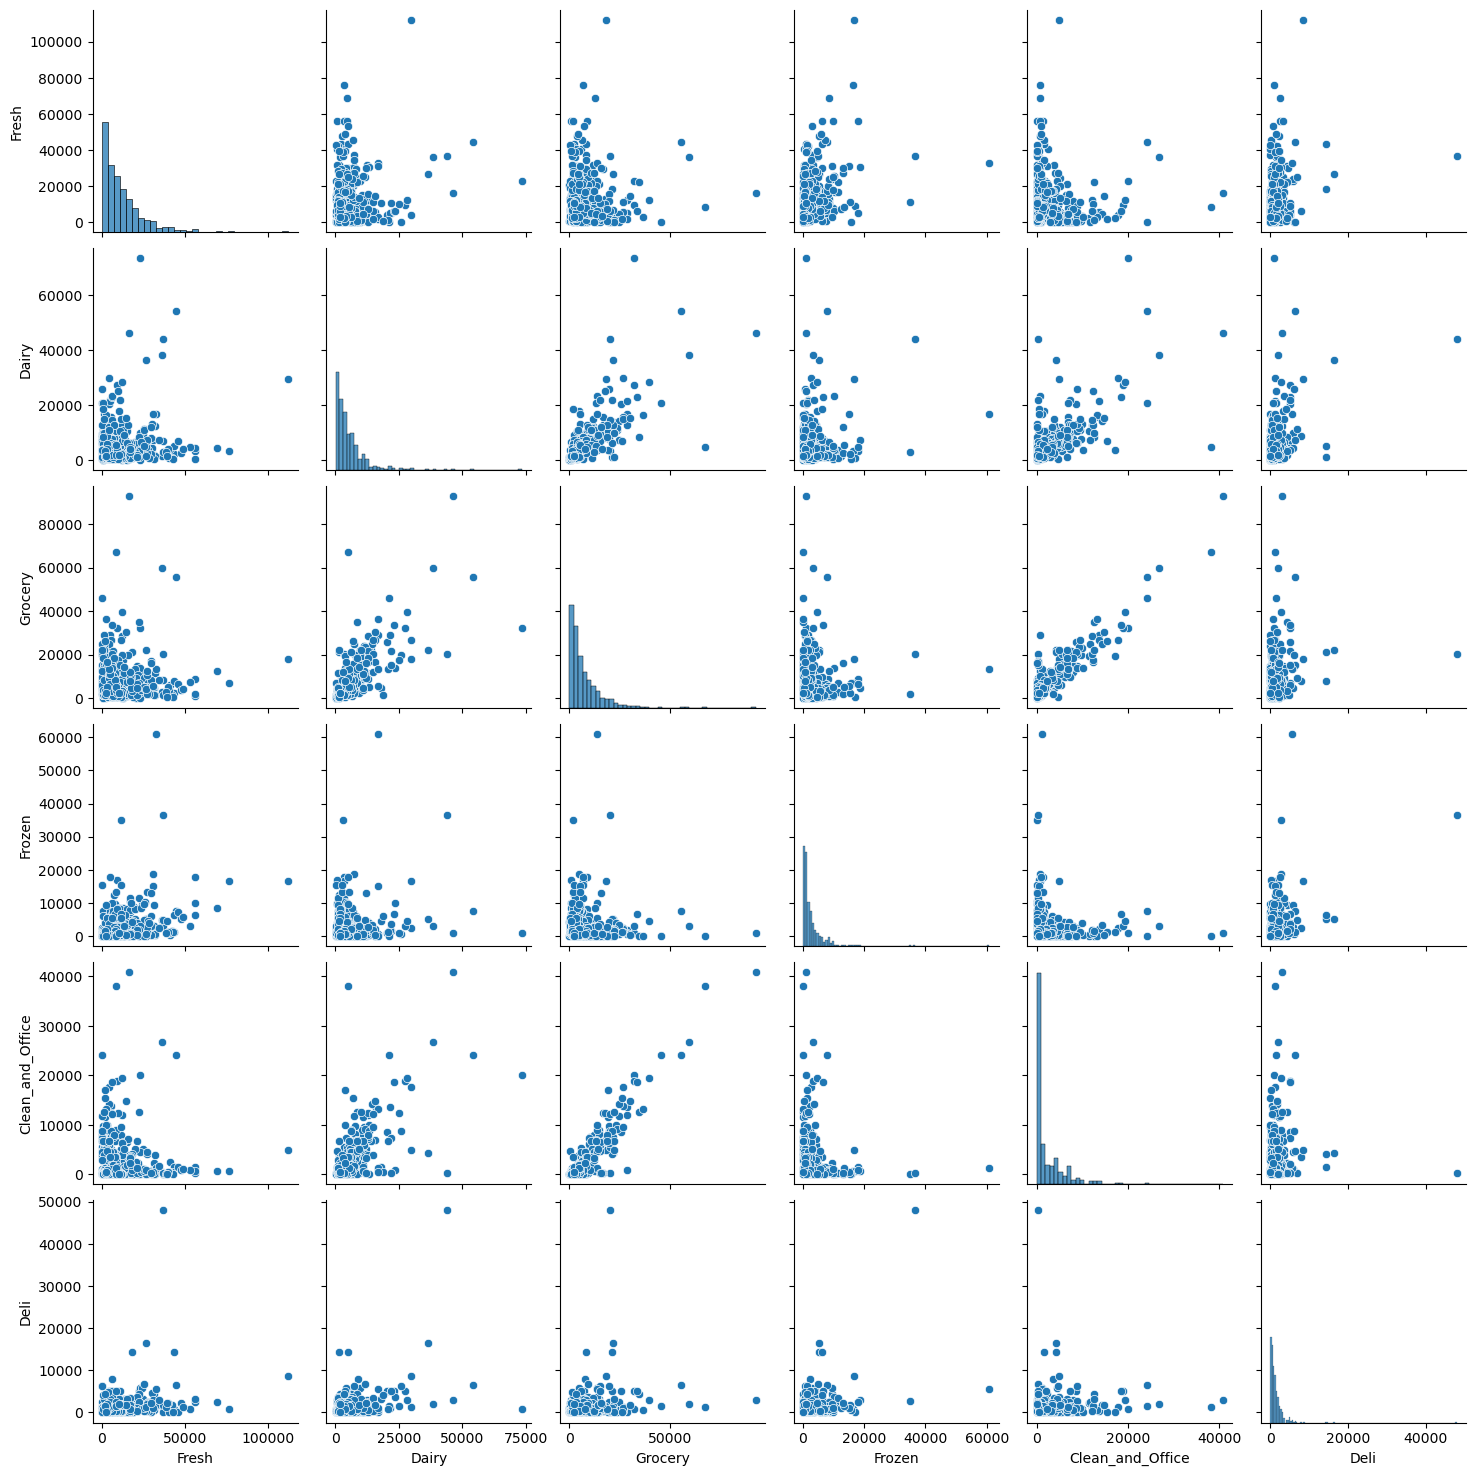

In [62]:
sns.pairplot(data=continuous_data)

#### Honestly this is a useful tool to get a general idea but there are still too many features for it to give the right idea of what the relationships are in the data. That being said, some notable standouts are that Grocery and Detergents_Paper have a strong linear relationship. Also, these scatter plots conbvey that there is a definite need to handle outliers in this dataset.

### Heat Map for column correlations:

<Axes: >

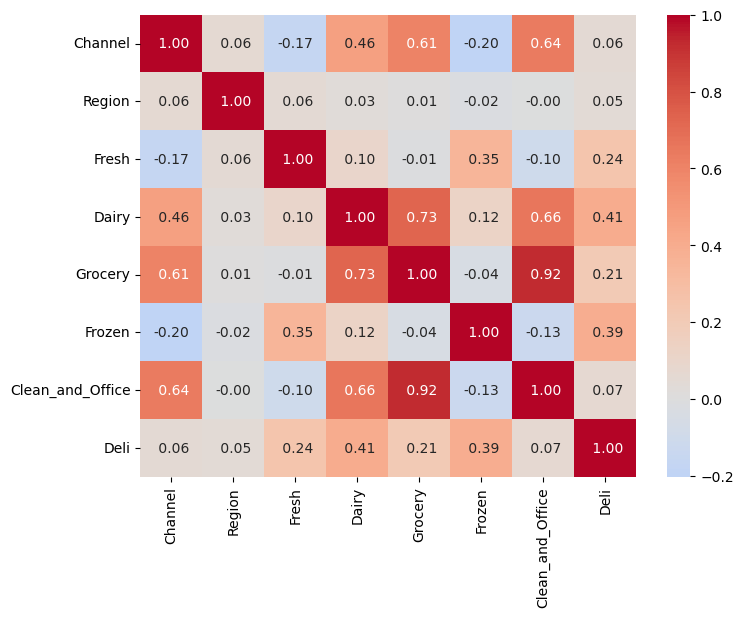

In [63]:
# Using Pearson's correlation to build the matrix since it is better at handling continuous data
correlation_matrix = data.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=' .2f', cmap='coolwarm', center=0)

## Finding and Handling Outliers

### Exploring the basic statistics of the unique 'Channels'

#### Channel 1: 

In [68]:
channel_one_data = data.loc[data['Channel'] == 1]
channel_one_data.describe()

,Channel,Region,Fresh,Dairy,Grocery,Frozen,Clean_and_Office,Deli
count,298.0,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,1.0,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
std,0.0,0.805013,13831.687502,4352.165571,3545.513391,5643.912500,1104.093673,3147.426922
min,1.0,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.0,2.000000,4070.250000,1164.500000,1703.750000,830.000000,183.250000,379.000000
50%,1.0,3.000000,9581.500000,2157.000000,2684.000000,2057.500000,385.500000,821.000000
75%,1.0,3.000000,18274.750000,4029.500000,5076.750000,4558.750000,899.500000,1548.000000
max,1.0,3.000000,112151.000000,43950.000000,21042.000000,60869.000000,6907.000000,47943.000000


/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


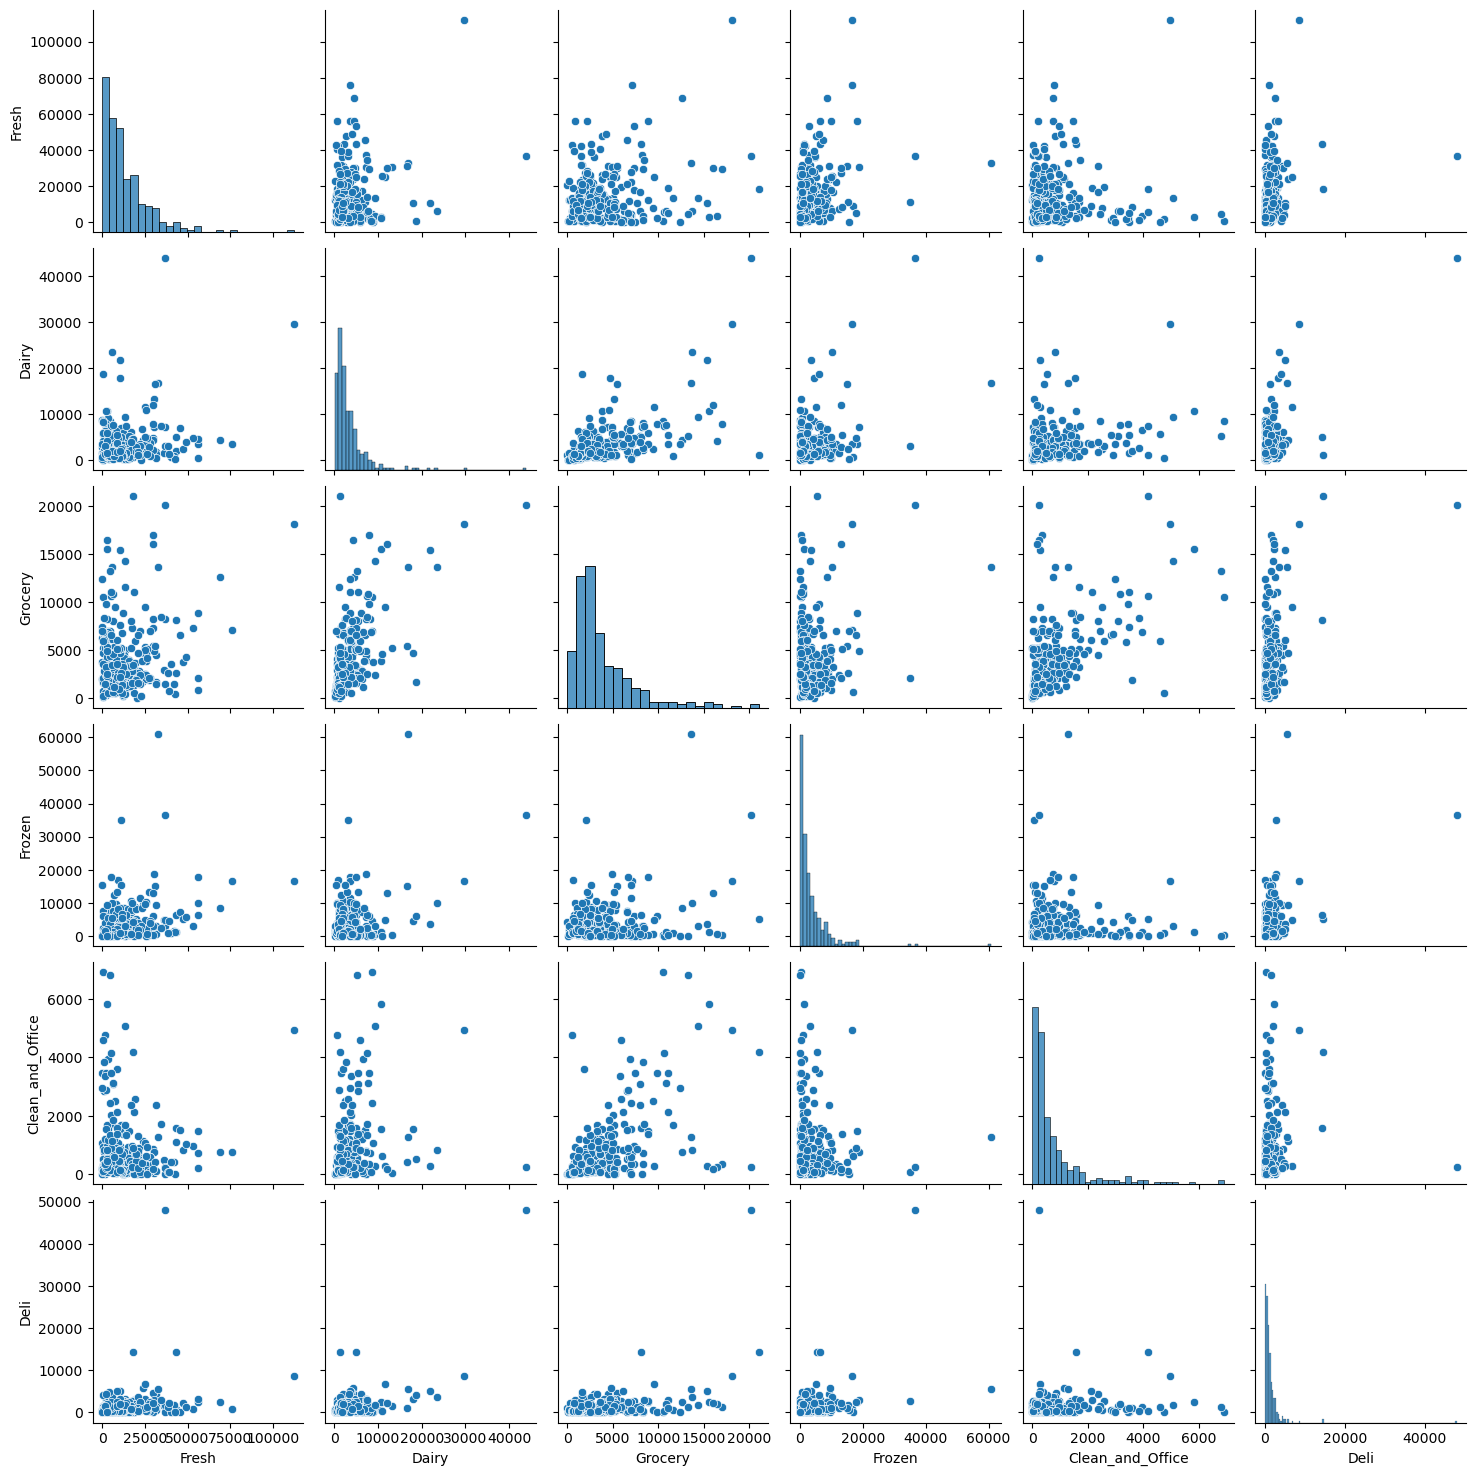

In [98]:
channel_one_numeric = channel_one_data.drop(columns=['Channel', 'Region'])
sns.pairplot(channel_one_numeric)

#### Channel 2:

In [69]:
# Channel 2
channel_two_data = data.loc[data['Channel'] == 2]
channel_two_data.describe()

,Channel,Region,Fresh,Dairy,Grocery,Frozen,Clean_and_Office,Deli
count,142.0,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2.0,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620
std,0.0,0.703069,8987.714750,9679.631351,12267.318094,1812.803662,6291.089697,1953.797047
min,2.0,1.000000,18.000000,928.000000,2743.000000,33.000000,332.000000,3.000000
25%,2.0,2.000000,2347.750000,5938.000000,9245.250000,534.250000,3683.500000,566.750000
50%,2.0,3.000000,5993.500000,7812.000000,12390.000000,1081.000000,5614.500000,1350.000000
75%,2.0,3.000000,12229.750000,12162.750000,20183.500000,2146.750000,8662.500000,2156.000000
max,2.0,3.000000,44466.000000,73498.000000,92780.000000,11559.000000,40827.000000,16523.000000


/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


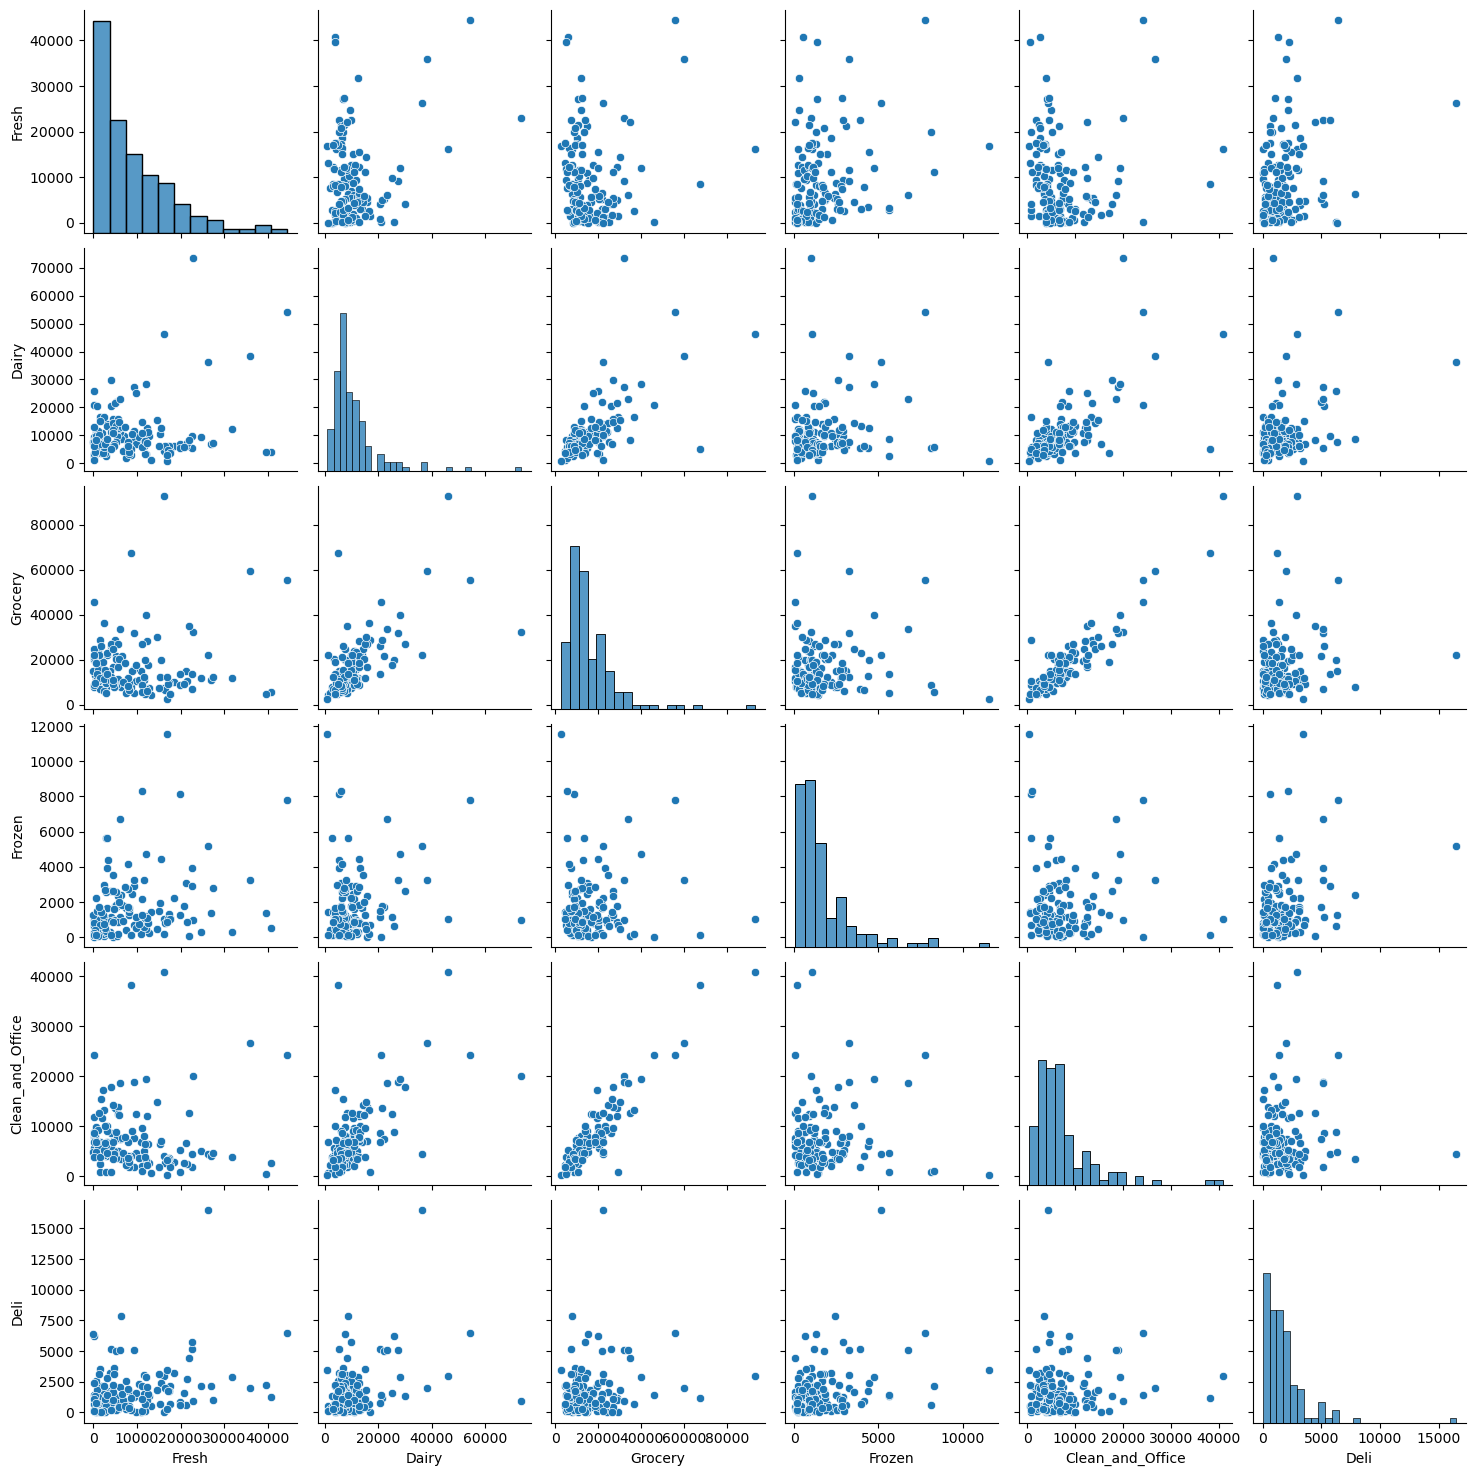

In [83]:
channel_two_numeric = channel_two_data.drop(columns=['Channel', 'Region'])
sns.pairplot(channel_two_numeric)

### Exploring Basic Stats based on Region

In [ ]:
# Region 1
region_one_data = data.loc[data['Region'] == 1]
region_one_data['Channel'].value_counts()

In [ ]:
# Regionn 2
region_two_data = data.loc[data['Region'] == 2]
region_two_data['Channel'].value_counts()

In [ ]:
# Region 3 
region_three_data = data.loc[data['Region'] == 3]
region_three_data['Channel'].value_counts()

### Cap the outliers

In [89]:
def outlier_capping(df, columns):
    """
    Cap the outliers in the dataframe 'df' for the specified 'columns' at the 5th and 95th percentiles.
    
    :param df: Pandas DataFrame containing the data
    :param columns: List of column names to apply the capping
    :return: DataFrame with outliers capped
    """
    capped_df = df.copy()
    for column in columns:
        # Calculate the percentiles
        low_limit, high_limit = capped_df[column].quantile([0.05, 0.95])
        # Cap the values
        capped_df[column] = capped_df[column].clip(lower=low_limit, upper=high_limit)
    return capped_df

#### Channel 1:

In [85]:
channel_one_data.describe()

,Channel,Region,Fresh,Dairy,Grocery,Frozen,Clean_and_Office,Deli
count,298.0,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,1.0,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
std,0.0,0.805013,13831.687502,4352.165571,3545.513391,5643.912500,1104.093673,3147.426922
min,1.0,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.0,2.000000,4070.250000,1164.500000,1703.750000,830.000000,183.250000,379.000000
50%,1.0,3.000000,9581.500000,2157.000000,2684.000000,2057.500000,385.500000,821.000000
75%,1.0,3.000000,18274.750000,4029.500000,5076.750000,4558.750000,899.500000,1548.000000
max,1.0,3.000000,112151.000000,43950.000000,21042.000000,60869.000000,6907.000000,47943.000000


In [88]:
channel_one_data_capped = outlier_capping(channel_one_data, columns=['Fresh', 'Dairy', 'Grocery', 
                                                                  'Frozen', 'Clean_and_Office', 'Deli'])
channel_one_data_capped.describe()

,Channel,Region,Fresh,Dairy,Grocery,Frozen,Clean_and_Office,Deli
count,298.0,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,1.0,2.510067,12678.171980,3031.951342,3760.041107,3307.059564,730.821309,1132.424497
std,0.0,0.805013,10881.649891,2436.748464,2843.787757,3410.743097,870.975630,990.923738
min,1.0,1.000000,576.850000,537.150000,607.450000,236.150000,46.550000,61.100000
25%,1.0,2.000000,4070.250000,1164.500000,1703.750000,830.000000,183.250000,379.000000
50%,1.0,3.000000,9581.500000,2157.000000,2684.000000,2057.500000,385.500000,821.000000
75%,1.0,3.000000,18274.750000,4029.500000,5076.750000,4558.750000,899.500000,1548.000000
max,1.0,3.000000,39381.900000,9264.550000,11179.900000,12653.900000,3392.700000,3705.600000


#### Channel 2: 

In [90]:
channel_two_data.describe()

,Channel,Region,Fresh,Dairy,Grocery,Frozen,Clean_and_Office,Deli
count,142.0,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2.0,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620
std,0.0,0.703069,8987.714750,9679.631351,12267.318094,1812.803662,6291.089697,1953.797047
min,2.0,1.000000,18.000000,928.000000,2743.000000,33.000000,332.000000,3.000000
25%,2.0,2.000000,2347.750000,5938.000000,9245.250000,534.250000,3683.500000,566.750000
50%,2.0,3.000000,5993.500000,7812.000000,12390.000000,1081.000000,5614.500000,1350.000000
75%,2.0,3.000000,12229.750000,12162.750000,20183.500000,2146.750000,8662.500000,2156.000000
max,2.0,3.000000,44466.000000,73498.000000,92780.000000,11559.000000,40827.000000,16523.000000


In [91]:
channel_two_data_capped = outlier_capping(channel_two_data, columns=['Fresh', 'Dairy', 'Grocery', 
                                                                  'Frozen', 'Clean_and_Office', 'Deli'])
channel_two_data_capped.describe()

,Channel,Region,Fresh,Dairy,Grocery,Frozen,Clean_and_Office,Deli
count,142.0,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2.0,2.612676,8465.771831,9961.722535,15273.816901,1530.571831,6854.816901,1628.577465
std,0.0,0.703069,7678.707181,6378.405351,8263.415092,1369.596339,4712.162964,1383.146760
min,2.0,1.000000,200.950000,3052.700000,5235.550000,130.050000,996.100000,110.500000
25%,2.0,2.000000,2347.750000,5938.000000,9245.250000,534.250000,3683.500000,566.750000
50%,2.0,3.000000,5993.500000,7812.000000,12390.000000,1081.000000,5614.500000,1350.000000
75%,2.0,3.000000,12229.750000,12162.750000,20183.500000,2146.750000,8662.500000,2156.000000
max,2.0,3.000000,26287.000000,27391.500000,34731.700000,5133.100000,18890.400000,5182.250000


#### Combining the two capped dataframes to move on to the feature engineering step

In [95]:
# Sanity check to make sure the indexes remained distinct
channel_one_data_capped.head(10) # The indexes remained distinct
print(channel_one_data_capped.shape, channel_two_data_capped.shape, (298 + 142) == 440) #total number of original rows 

(298, 8) (142, 8) True


In [99]:
frames = [channel_one_data_capped, channel_two_data_capped]
clean_data = pd.concat(frames)
clean_data.shape # Shape is correct, its 440 total rows and 8 columns
clean_data.describe()

,Channel,Region,Fresh,Dairy,Grocery,Frozen,Clean_and_Office,Deli
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,11318.715568,5268.377500,7475.850568,2733.738523,2707.201705,1292.546591
std,0.468052,0.774272,10145.647570,5253.991226,7512.974117,3027.230386,3982.573710,1154.425161
min,1.000000,1.000000,200.950000,537.150000,607.450000,130.050000,46.550000,61.100000
25%,1.000000,2.000000,3127.750000,1599.750000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4975.000000,1526.000000,845.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3521.250000,1820.250000
max,2.000000,3.000000,39381.900000,27391.500000,34731.700000,12653.900000,18890.400000,5182.250000


### Feature Engineering:
#### Encoding 'Channel' and 'Region' columns so that the model doesn't assume an ordinal relationship
#### To streamline the process I will do the feature engineering portion and the encoding in a preprocessing pipeline

In [106]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_feats = ['Fresh', 'Dairy', 'Grocery', 'Frozen', 'Clean_and_Office', 'Deli']
cat_feats = ['Channel', 'Region']

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats),  # Standardizing numeric features
        ('cat', OneHotEncoder(), cat_feats)  # One-hot encoding categorical features
    ])

#Define PCA
pca = PCA(n_components=2)

# Create pipeline
preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

preprocessed_data = preprocess_pipeline.fit_transform(clean_data)


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

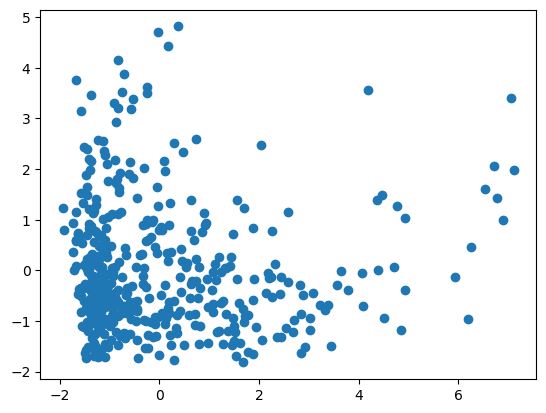

In [112]:
plt.scatter(x= preprocessed_data[:,0], y= preprocessed_data[:,1])

### K-Means Clusters - Initial Attempt

/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


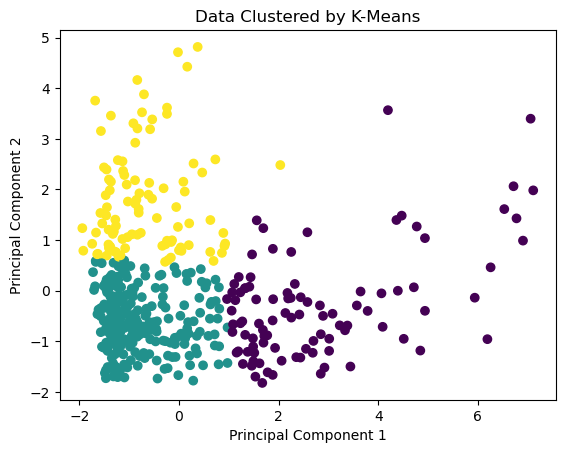

In [118]:
from sklearn.cluster import KMeans

#Choosing to start with 3. 
kmeans = KMeans(n_clusters = 3, random_state= 44)
#Fit the model
kmeans.fit(preprocessed_data)

# Predicting the clusters
labels = kmeans.predict(preprocessed_data)

# Plotting the clusters
plt.scatter(preprocessed_data[:, 0], preprocessed_data[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Clustered by K-Means')
plt.show()

### K-Means Clusters - Optimizing for 'k' clusters

/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

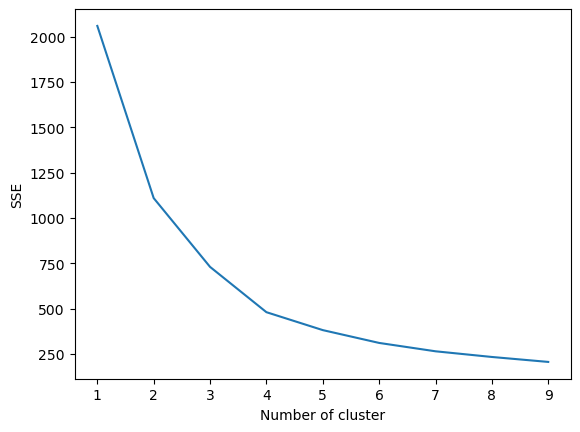

In [120]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(preprocessed_data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


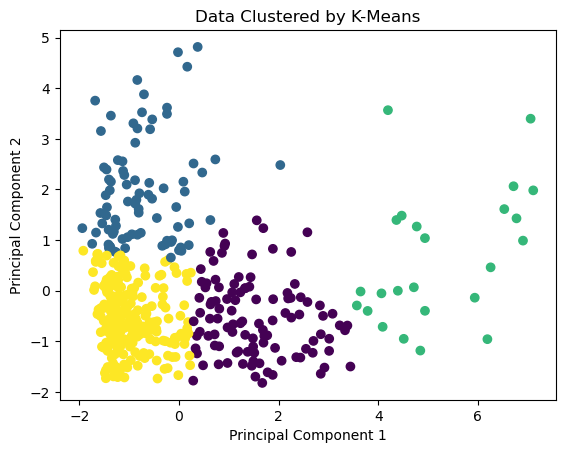

In [121]:
#Choosing optimized K. 
kmeans = KMeans(n_clusters = 4, random_state= 44)
#Fit the model
kmeans.fit(preprocessed_data)

# Predicting the clusters
labels = kmeans.predict(preprocessed_data)

# Plotting the clusters
plt.scatter(preprocessed_data[:, 0], preprocessed_data[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Clustered by K-Means')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [123]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
#cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters = 4) # We already know that 4 is the optimal number of clusters.

ac_model = ac.fit_predict(preprocessed_data)



#### Plotting the Dendogram:

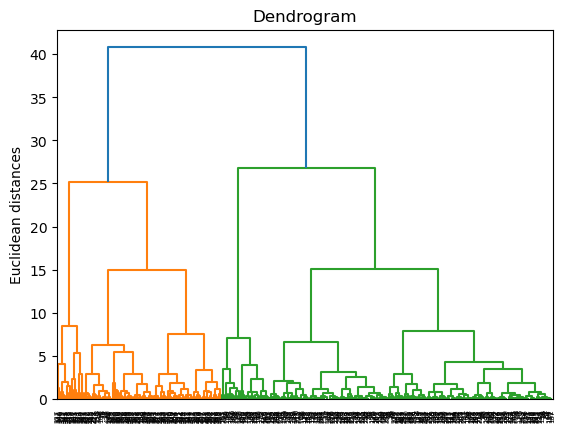

In [128]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.show()

plot_dendrogram(preprocessed_data)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

#### The code block below is a copy of the previous pipeline so that its easy to see the adjustments.Namely, I've commented out the PCA sectiona and I'm deleting it as a step

In [145]:
num_feats = ['Fresh', 'Dairy', 'Grocery', 'Frozen', 'Clean_and_Office', 'Deli']
cat_feats = ['Channel', 'Region']

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats),  # Standardizing numeric features
        ('cat', OneHotEncoder(), cat_feats)  # One-hot encoding categorical features
    ])

# Commented out the PCA portion so that its not a part of this updated pipeline anymore
#pca = PCA(n_components=2)

# Create updated pipeline
encoded_and_scaled_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
                           #('pca', pca)])

encoded_and_scaled_data = encoded_and_scaled_pipeline.fit_transform(clean_data)

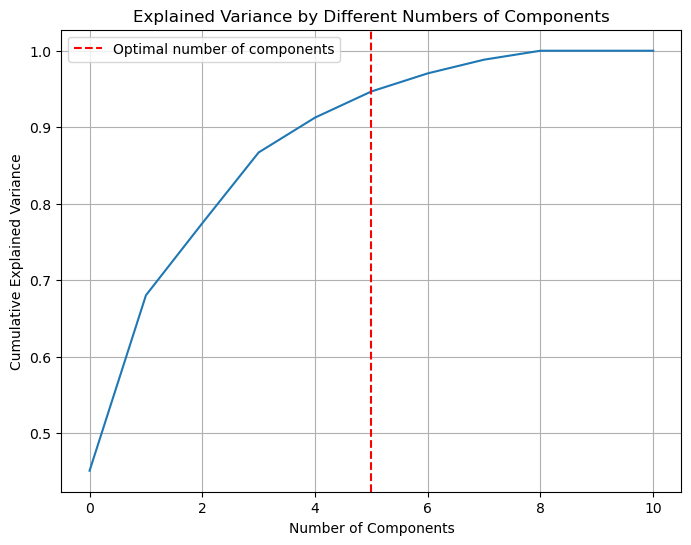

In [138]:
# Fit PCA without specifying the number of components to retain all components and evaluate their variance
pca = PCA().fit(encoded_and_scaled_data)

# Plotting the cumulative sum of explained variance
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# Add a vertical line at the elbow point
elbow_point = 5  # Hypothetical example value, you'll need to determine this from your plot
plt.axvline(x=elbow_point, color='r', linestyle='--', label='Optimal number of components')
plt.legend()
plt.title('Explained Variance by Different Numbers of Components')
plt.grid(True)
plt.show()

#### Which top 5 features are the most important in explaining a significant portion of the variance in the data:

In [144]:
# Fit PCA with the optimal number of components
pca = PCA(n_components=5)
pca.fit(encoded_and_scaled_data)

# Access the loadings of the PCA components
loadings = pca.components_

# If you also want to display the composition of the components with the original feature names:
feature_names = list(clean_data.columns)  # Adjust this line to match your dataset

# Display the loadings (admittedly got A LOT of help with this part because I had/have no idea how to do it)
for i, component in enumerate(loadings):
    print(f"Component {i+1}:")
    for value, name in sorted(zip(component, feature_names), key=lambda x: -abs(x[0])):
        print(f"{name}: {value:.3f}")
    print("\n")

Component 1:
Fresh: 0.542
Grocery: 0.532
Region: 0.511
Frozen: 0.221
Clean_and_Office: -0.208
Deli: 0.208
Dairy: -0.124
Channel: -0.106


Component 2:
Channel: 0.599
Dairy: 0.592
Frozen: 0.516
Region: 0.121
Grocery: -0.057
Clean_and_Office: 0.051
Deli: -0.051
Fresh: 0.024


Component 3:
Frozen: 0.729
Dairy: -0.617
Grocery: -0.225
Fresh: -0.168
Region: -0.060
Channel: -0.022
Clean_and_Office: -0.003
Deli: 0.003


Component 4:
Channel: 0.789
Dairy: -0.482
Frozen: -0.348
Grocery: 0.084
Fresh: 0.080
Clean_and_Office: -0.048
Deli: 0.048
Region: -0.015


Component 5:
Region: -0.083
Dairy: -0.073
Channel: 0.070
Clean_and_Office: 0.060
Deli: -0.060
Grocery: 0.058
Fresh: 0.050
Frozen: 0.044




### Plotting the whole thing together -  PCA (2 Components) of Wholesale Data with KMeans Clusters (k=4)

/Users/zachrosenthal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


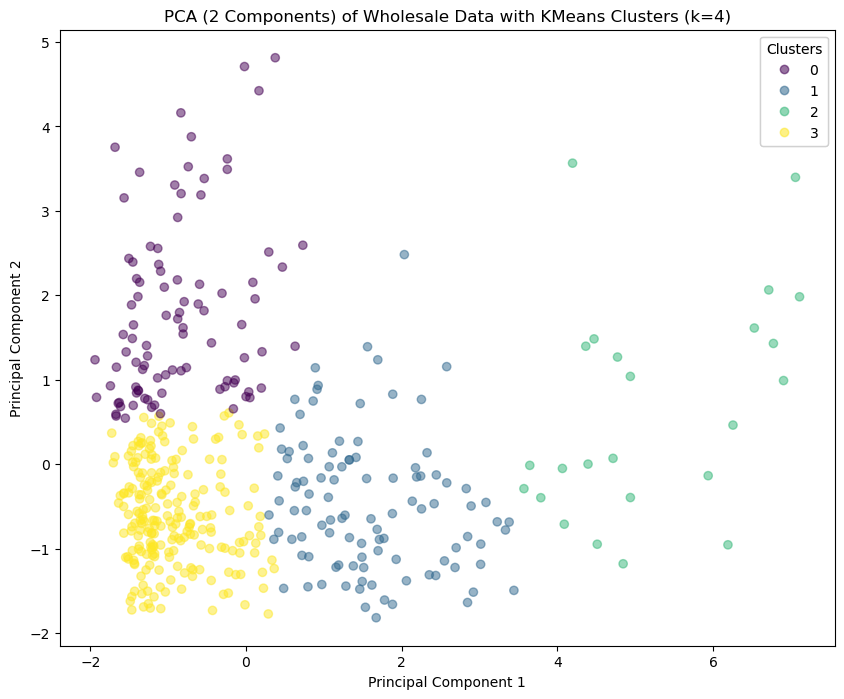

In [152]:
# Step 2: Apply PCA with n_components=5
pca = PCA(n_components=5)
X_pca = pca.fit_transform(encoded_and_scaled_data)

# Step 3: Apply KMeans clustering with 4 clusters on the PCA-reduced dataset
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)

# For visualization purposes, use the first two principal components
PC1 = X_pca[:, 0]
PC2 = X_pca[:, 1]

# Step 4: Plotting the first two principal components and color by cluster label
plt.figure(figsize=(10, 8))
scatter = plt.scatter(PC1, PC2, c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('PCA (2 Components) of Wholesale Data with KMeans Clusters (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding a legend for clusters
legend1 = plt.legend(*scatter.legend_elements(), loc="best", title="Clusters")
plt.gca().add_artist(legend1)


plt.show()

# Part V - Conclusion

1. Principal Component Analysis with five components was determined to optimally capture the variance within the dataset, providing a balanced view of the grocery store's sales data across different product categories. This dimensionality reduction technique revealed that 'Fresh', 'Grocery', and 'Region' were significant factors in the first component, indicating their strong influence on the variance in customer purchasing behavior, which could be pivotal for store layout optimization and inventory planning.

2. The exploratory data analysis revealed distinct sales behaviors across the two channels, necessitating channel-specific outlier handling for a more accurate representation of each channel’s data profile. The outlier_capping function was implemented to trim outliers based on a 5% and 95% percentile capping strategy, ensuring that each channel's unique distribution was preserved for subsequent analyses.

3. A strong positive correlation (0.92) between 'Grocery' and 'Clean_and_Office' suggests potential cross-selling opportunities or customer segments with overlapping interests. This insight could inform targeted marketing campaigns and inventory management to capitalize on the synergy between these product categories.

4. Hierarchical and K-Means clustering analyses yielded different optimal cluster counts, with the former suggesting two clusters and the latter four, indicating variability in customer groupings based on purchasing patterns. This discrepancy warrants further investigation and may suggest that customer segmentation is multi-faceted and cannot be neatly categorized without considering additional variables or clustering techniques.
